In [29]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
def plot_training_loss(data, num_epochs, title, type="Training", tick_interval=100, baseline=False, average=False):
    colors = sns.color_palette("husl", 2)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    batches_per_epoch = len(data) // num_epochs

    xs = range(len(data))

    plt.plot(xs, data, color=colors[0], label=f"{type} {title}")

    window_size = 10
    padding = [data[0]] * (window_size//2) + data + [data[-1]] * (window_size//2)
    moving_avg = np.convolve(padding, np.ones(window_size)/window_size, mode='valid')
    xs_ma = np.arange(window_size//2, len(padding)-window_size//2 + 1, 1)
    plt.plot(xs_ma - window_size//2, moving_avg, color=colors[1], label='Moving Average')

    plt.title(f"{type} {title} per Batch")
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(data)+1, tick_interval), range(0, (len(data)+1)*tick_interval, tick_interval**2))
    plt.tick_params(axis='both', which='major', labelsize=12)

    if baseline:
        plt.axhline(y=0.9844, color='r', linestyle='--', label='Blank Baseline (0.9844)')
    if average:
        avg_loss = round(sum(data) / len(data), 4)
        plt.axhline(y=avg_loss, color='b', linestyle='--', label=f'Average Loss ({avg_loss})')

    for epoch in range(1, num_epochs+1):
        epoch_end = epoch * batches_per_epoch
        plt.axvline(x=epoch_end-1, linestyle='dotted', color='black')

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


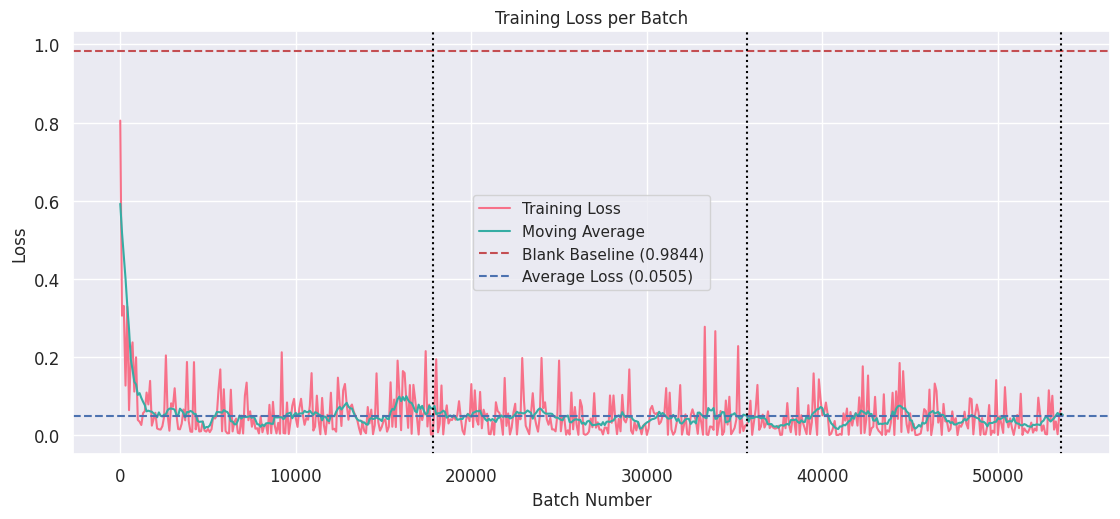

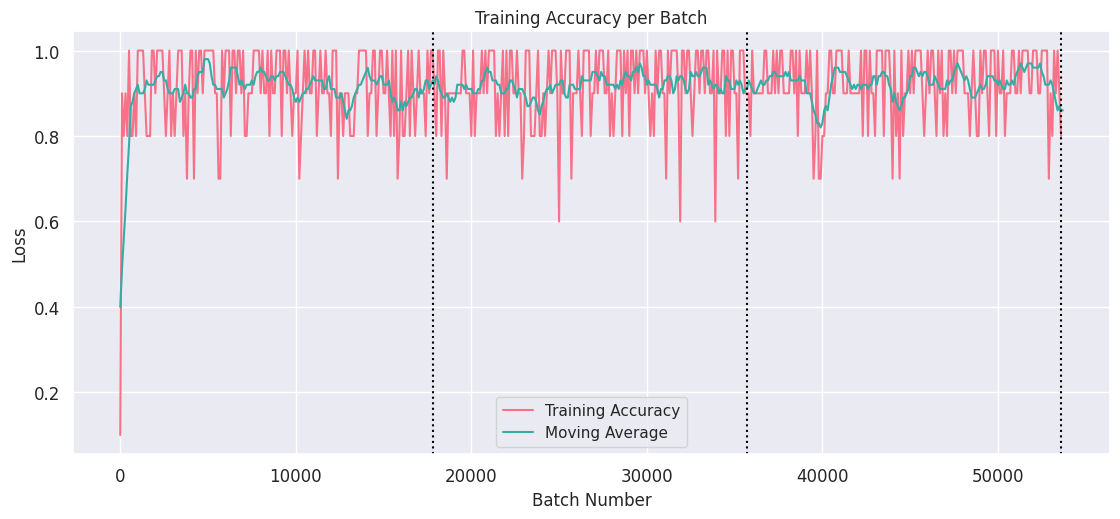

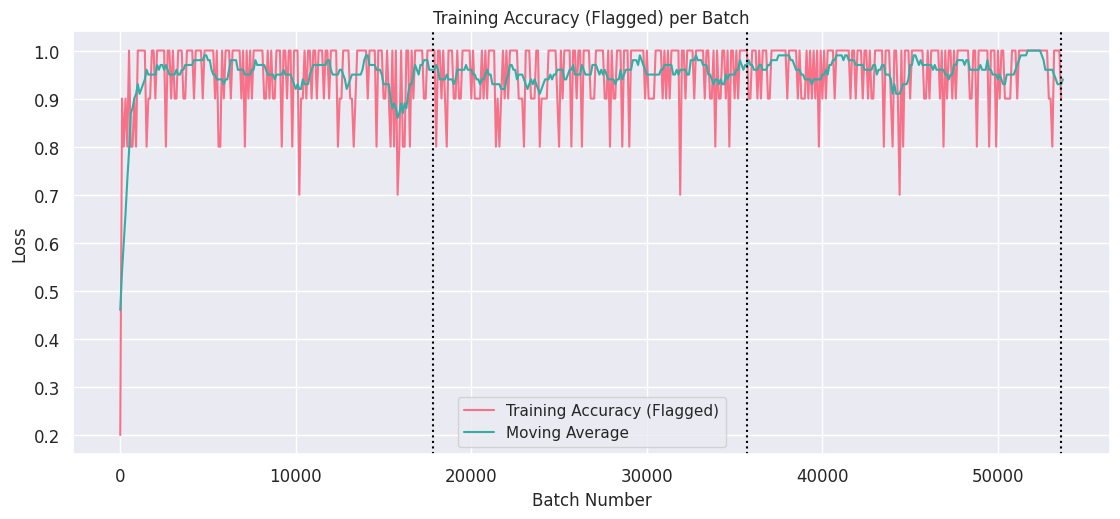

In [31]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/agb-1/checkpoints/train_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
plot_training_loss(data['loss'], data.get('num_epochs', 3), "Loss", baseline=True, average=True)
plot_training_loss(data['acc'], data.get('num_epochs', 3), "Accuracy")
plot_training_loss(data['acc_flag'], data.get('num_epochs', 3), "Accuracy (Flagged)")


In [32]:
def plot_val_loss(data, num_epochs, title, tick_interval=10):
    colors = sns.color_palette("husl", len(data))
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))

    xs = range(len(list(data.values())[1]))

    for i, (label, d) in enumerate(data.items()):
        plt.plot(xs, d, color=colors[i], label=f"Validation {label}")

    plt.title(f'Validation {title} per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.tick_params(axis='both', which='major', labelsize=12)

    plt.legend()
    plt.tight_layout(pad=3)
    plt.show()


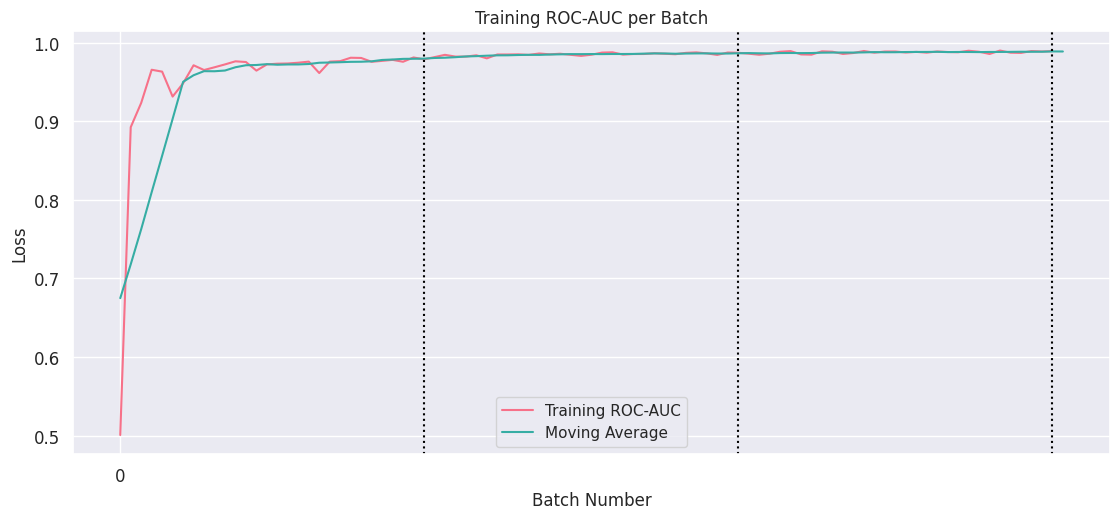

In [39]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/agb-1/checkpoints/val_metrics.json'
with open(json_path, 'r') as f:
    data = json.load(f)
# plot_training_loss(data['loss'], data['num_epochs'], "Loss", type="Validation", tick_interval=10, average=True)
sub_data = {
    "Recall": data["recall"],
    "Precision": data["precision"],
    "F1": data["f1"],
}
# plot_val_loss(sub_data, data['num_epochs'], "Loss")
auc_data = [d['mean_auc'] for d in data['auc']]
plot_training_loss(auc_data, data['num_epochs'], "ROC-AUC")